Oppgave 1a: skrevet i notability på iPad 
Oppgave 1b: lager funksjon virrevandrer 
oppgave 1c: plotter funksjonen 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy.random as random 
import scipy.optimize as optimize


def virrevandrer(M, pR): #oppgave 1b
    """
    Funksjonen lager en array for virrevandrerens posisjon og tid
    M: antall tidssteg
    pR: sannsynlighet for å gå til høyre 
    """
    dx = 1 
    pos = np.zeros(M)
    time = np.linspace(0,M, M)
    p_array = random.uniform(0,1, M)
    for i in range(1, M):
        if  p_array[i] > pR: 
            pos[i] = pos[i-1] + dx
        else: 
            pos[i] = pos[i-1] - dx

    return pos, time

 #oppgave 1c 
prob = [0.45, 0.5, 0.55]
for i in range(len(prob)):
    pos, time = virrevandrer(1000, prob[i]); plt.plot(time, pos, label = f'pR = {prob[i]}')
plt.plot(time,np.zeros(len(time)), 'r--')
plt.legend()


oppgave 1d: gjør simuleringer M simuleringer for virrevandrere med N steg 
oppgave 1e: genererer alle tallene før beregningen, setter verdiene i matrisen til enten 1 eller -1 med tanke på pR og bruker cumsum for å summere opp verdiene


In [ ]:
def multi_virrevandrer(N,M,pR, plot = False):
    A = np.zeros((M, N))
    for i in range(M):
        pos, time = virrevandrer(N, pR)
        if(plot != False):
            plt.plot(time, pos)
        A[i] = pos
    plt.show 
    #return A, time
multi_virrevandrer(1000, 1000, 0.5)   


In [186]:
def multi_virrevandrer2(N, M, pR = 1/2, plot = False):
    pos = random.choice([-1,1], size = (M,N), p = [pR, 1 - pR]) #lager en matrise med -1 og 1 med størrelse N*M og p = pR
    time = np.linspace(0, N, N) #tid
    
    for i in range(M): #plottene 
        pos[i] =np.cumsum(pos[i])
        if(plot != False):
            plt.plot(time, pos[i])
    return pos, time
pos, time = multi_virrevandrer2(1000,1000, 0.5)

In [ ]:
def linear_func(x, a, b):
    return a*x + b 

def varians(N,M, pR, plot = False):
    pos, time = multi_virrevandrer2(N,M, pR, plot)
    posT = pos.T
    var = np.zeros(len(posT))
    for i in range(len(posT)):
        var[i] = np.var(posT[i])

    popt, pcov = optimize.curve_fit(linear_func, time, var)
    fitted_curve = linear_func(time, *popt)
    print(f'Stigningstall: {(fitted_curve[-1] - fitted_curve[0])/(time[-1] - time[0])}')
    plt.figure()
    plt.plot(time, var, '.r', label = 'varians')
    plt.plot(time, fitted_curve)
    plt.legend()
    plt.show()
varians(1000,1000, 0.5)

Oppgave 1g: Gjør det samme som funksjonen i 1d, men i 2 dimensjoner 

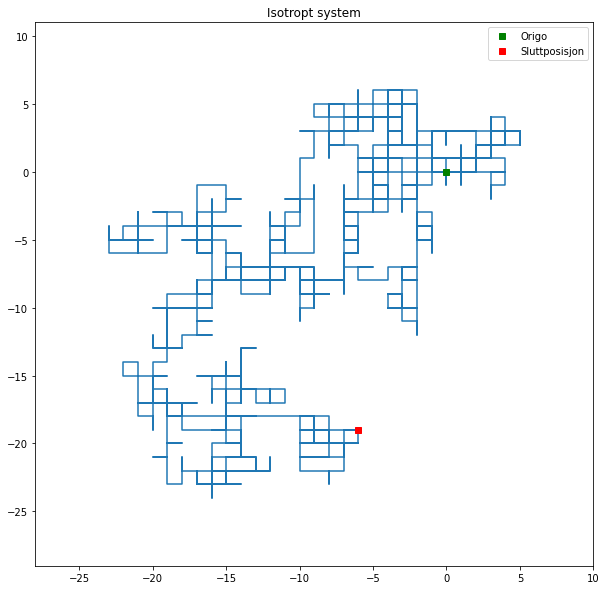

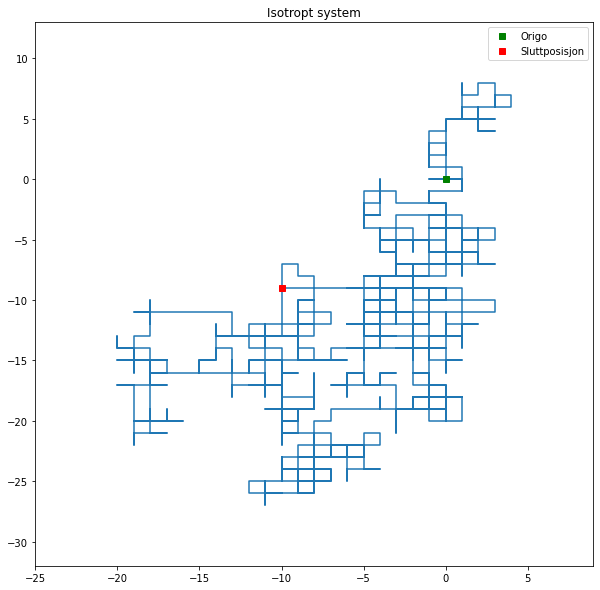

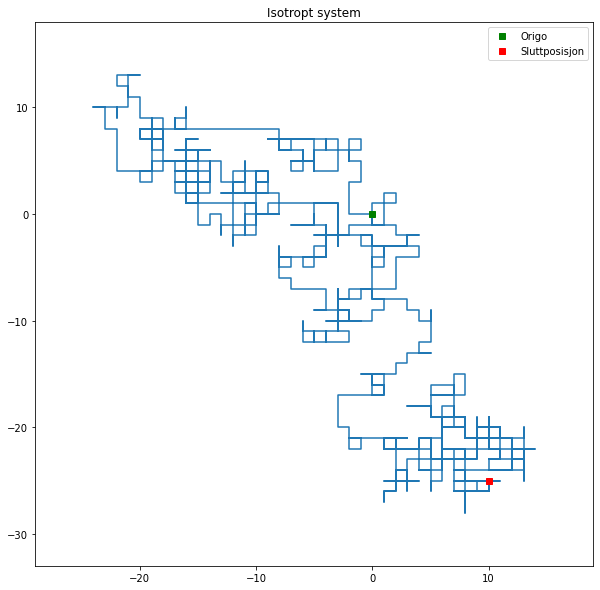

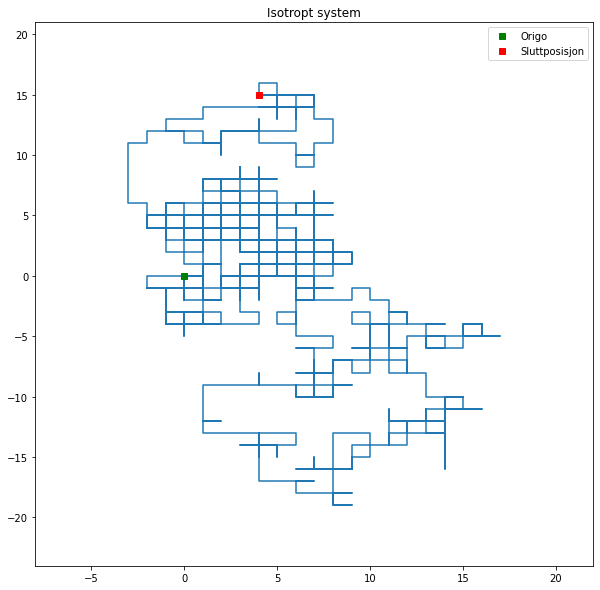

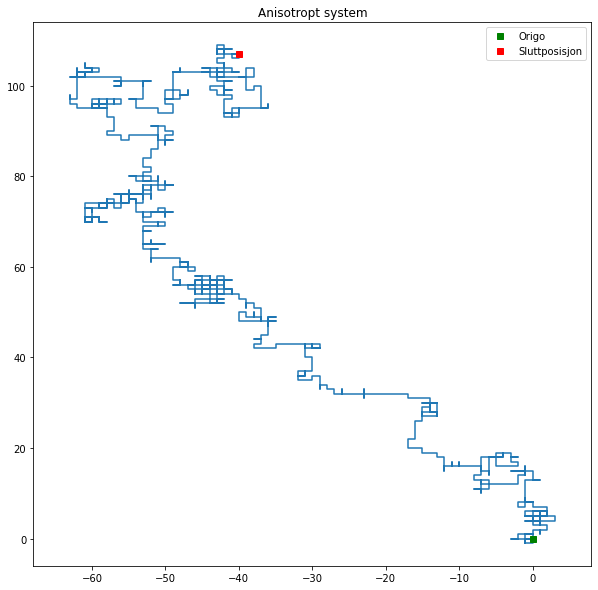

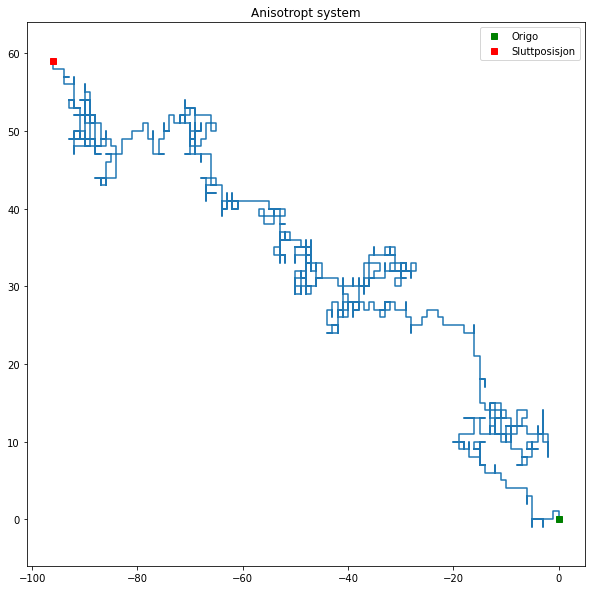

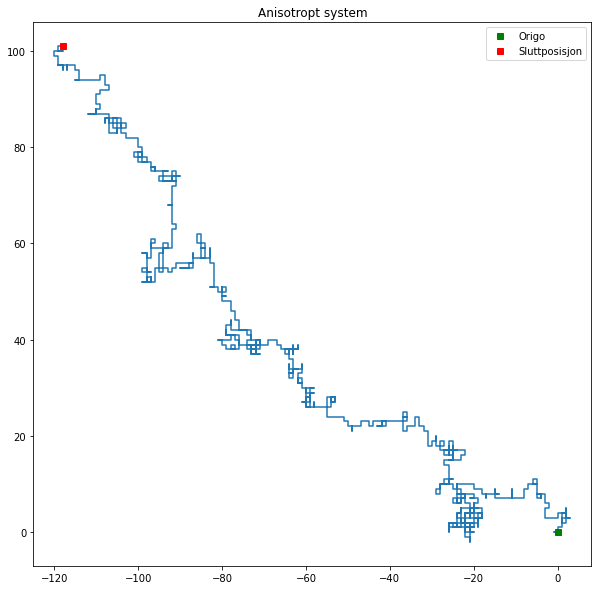

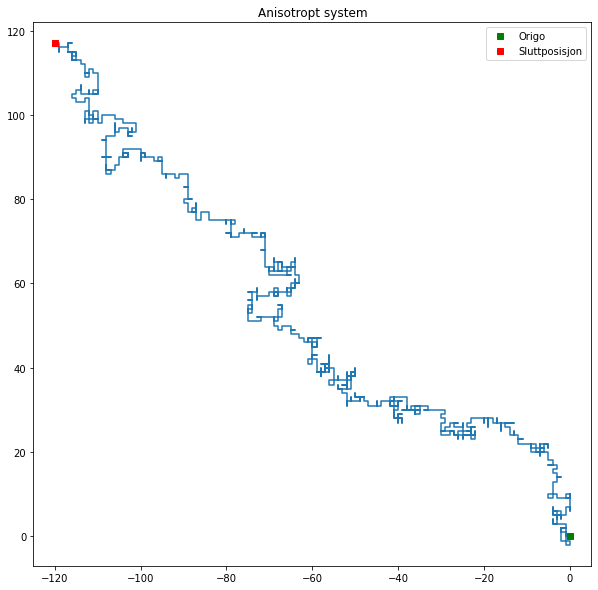

In [304]:
def multi_dim_virrevandrer(M, pR = 1/2, pU = 1/2, plot = False):
    vertical = np.zeros(M)
    horisontal = np.zeros(M)
    randints1 = random.uniform(0,1,M)
    randints2 = random.uniform(0,1,M)
    for i in range(1,M):
        if randints1[i] > 0.5:
            if randints2[i] > pU:
                vertical[i] = vertical[i-1] + 1 
                horisontal[i] = horisontal[i-1]
            else:
                vertical[i] = vertical[i-1] - 1
                horisontal[i] = horisontal[i-1] 
        else: 
            if randints2[i] > pR:
                horisontal[i] = horisontal[i-1] + 1 
                vertical[i] = vertical[i-1]
            else:
                horisontal[i] = horisontal[i-1] - 1 
                vertical[i] = vertical[i-1]
    width = 0 
    height = 0 

    if(plot != False):
        plt.axis([horisontal.min() - 5, horisontal.max() + 5, vertical.min() - 5, vertical.max() + 5])
        plt.plot(horisontal, vertical)
        plt.plot(0,0, 'sg', label = 'Origo')
        plt.plot(horisontal[-1], vertical[-1], 'sr', label = 'Sluttposisjon')
        plt.legend()
        plt.show()
    return horisontal, vertical


for i in range(4):plt.figure(figsize = (10,10)); plt.title(f'Isotropt system'); multi_dim_virrevandrer(1000, 0.5, 0.5, plot = True)

for i in range(4):plt.figure(figsize = (10,10)); plt.title(f'Anisotropt system'); multi_dim_virrevandrer(1000, 0.6, 0.4, plot = True)
            


Oppgave 1h) lager funksjonen n(t)

In [301]:
def n(N, M, multi_dim = False):
    n = 0
    if(multi_dim == True):
        for i in range(N):
            horisontal, vertical = multi_dim_virrevandrer(M)
            j = 1
            while(j < M):
                if(horisontal[j] == 0 and vertical[j] == 0):
                    n +=1
                    j = M
                j+=1

    else:
        pos,time = multi_virrevandrer2(M, N)
        for i in range(N):
            if (len(pos[i]) -np.count_nonzero(pos[i]) > 0):
                n +=1
    p = n/(N)
    return n, p

print(n(1000, 2, True))
print(n(1000, 2, False))

(0, 0.0)
(514, 0.514)
